![hadoopspark](http://www.aptuz.com/static/media/uploads/blog/spark_and_hadoop.png)

# Spark Gallery Walk

## Instructions:
- Self-select into four groups based on interest
- Each group completes the assignment and each member should be prepared to talk on the findings
- Traveling:
 - First two members of each group will travel to learn about the other stations
 - Group member roles will switch and other two members will travel while the first two stay to educate
- While traveling, take notes on your handout
- At the end, take a few moments to pause and assess the common themes and connective tissue between each station. What are the key take-aways?


(Yes, I will provide a solution to this assignment come monday, but you'll get more out of it taking the first pass yourselves)

### Group A: Probability Problem

Using [this paper](https://lydiaychen.com/pdf/DSN14_Birke.pdf) (page 5) to inform you calculation:
- You server cluster has 10 VM cores in the cloud (10 VMs) that hosts your RDBMS
- Each core has a the same distribution of failure rate on a given day
- When a core fails, on average it is out of commission for a full day to be fixed
- Given this, how many days over the course of the year will you server not be at full capacity?

In [4]:
import numpy as np

gamma_sample = np.random.gamma(shape=1, scale=37.22, size=1000)


In [5]:
%pylab

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


Average Days until failure 36.18514236083493


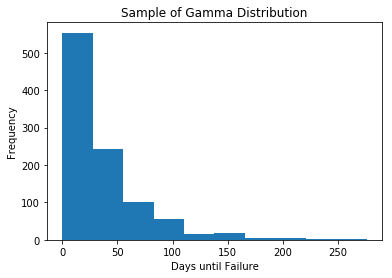

In [51]:
plt.hist(gamma_sample)
plt.title('Sample of Gamma Distribution')
plt.xlabel('Days until Failure')
plt.ylabel('Frequency')
print('Average Days until failure {}'.format(np.mean(gamma_sample)))

In [52]:

def sim_vm_year(num_machines=1):
    failure_days = []
    for i in range(num_machines):
        day = 0
        while day<365:
            days_to_failure = int(np.random.gamma(shape=1, scale=37.22))
            day += days_to_failure
            if day>=365: break
            failure_days.append(day)
            day += 1 # repair day
    return set(failure_days)


fails = sim_vm_year(10)

print('Simulated Failure Days')
print(fails)

print('\nNumber of Failures')
print(len(fails))


Simulated Failure Days
{257, 130, 3, 260, 258, 135, 264, 15, 143, 146, 276, 21, 280, 283, 155, 29, 30, 288, 32, 291, 164, 36, 165, 39, 168, 42, 298, 300, 44, 299, 305, 312, 59, 317, 189, 62, 320, 63, 324, 199, 328, 329, 204, 333, 209, 338, 81, 210, 85, 86, 89, 350, 225, 228, 229, 358, 103, 356, 361, 362, 359, 108, 109, 238, 230, 240, 242, 248}

Number of Failures
68


In [44]:
num_fail_list = []
for i in range(1000):
    num_fail_list.append(len(sim_vm_year(10)))


In [45]:
np.mean(num_fail_list)

86.076

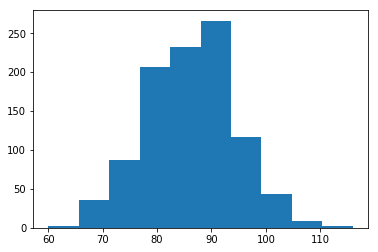

In [46]:
plt.hist(num_fail_list);

In [47]:
np.std(num_fail_listail_list)

8.12491378415796

### Group B: Physical demonstration

Make a physical demo of how file replication is an essential part of HDFS. Resources:
- [article one](https://cloudxlab.com/assessment/displayslide/143/hdfs-replication?playlist_id=24)
- [article two](https://hadoop.apache.org/docs/r1.2.1/hdfs_design.html) particularly the section on datanodes.
- [article three](https://data-flair.training/blogs/hadoop-cluster/) part on name node and data node

### Group C: Definitions and distinctions

For each pair of terms: 
- define each term
- list any commonalities or how they relate
- make any distinctions (how are they different, when is each appropriate)
- relate them back to Spark


| Term 1 |Term 2 |
|--------|-------|
| HDFS | RDD |
|MapReduce | Hadoop |
| distributed storage | distributed processing|
| structured data | unstructured |
| batch processing | real time processing |
| Transformations | Actions |
| Pandas | Spark|


[great resource](https://www.educba.com/mapreduce-vs-apache-spark/)


### Group D:

- Create a diagram of the relevant components of the Spark ecosystem, defining the role of each component
- Create a diagram of how they fit together in the spark architecture

### Optional Task:

Write as haiku capturing the essential message of your group's review.

![haiku](https://media0.giphy.com/media/hM4bplPW4R7dC/giphy.gif?cid=790b76115d14333a7653745a51666253&rid=giphy.gif)